In [1]:
# First we import the libraries

import pandas as pd
import numpy as np

from warnings import filterwarnings

filterwarnings(action='ignore')

In [2]:
flights = pd.read_csv('flights.csv')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500.0,20.0,38.0,2023-01-01 20:00:00
1,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760.0,23.0,0.0,2023-01-01 23:00:00
2,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576.0,23.0,44.0,2023-01-01 23:00:00
3,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636.0,21.0,40.0,2023-01-01 21:00:00
4,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488.0,20.0,48.0,2023-01-01 20:00:00


In [3]:
planes = pd.read_csv('planes.csv')
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


In [4]:
#For convenience,i've worked with smaller versions of these datasets.

flights2 = flights[["dest", "origin", "dep_delay",
                    "arr_delay", "distance", "tailnum"]]

planes2 = planes[["tailnum", "type", "engines"]]



In [5]:
# A Left Join

left_joined = pd.merge(flights2,       # the "left" dataframe
                       planes2,        # the "right" dataframe
                       how='left',   # which observations to keep? Here we are specifying that we keep the "left" dataset
                       on='tailnum'  # the join key
                       )

left_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2.0
1,ATL,JFK,78.0,53.0,760.0,N830DN,Fixed wing multi engine,2.0
2,BQN,JFK,47.0,34.0,1576.0,N807JB,Fixed wing multi engine,2.0
3,CHS,JFK,173.0,166.0,636.0,N265JB,Fixed wing multi engine,2.0
4,DTW,EWR,228.0,211.0,488.0,N17730,Fixed wing multi engine,2.0


If we inspect this joined dataset, we can see that there are flights that their corresponding plane doesn't exist in the plane dataset.

In [6]:
# A Right Join

right_joined = pd.merge(flights2, planes2, how='right', on='tailnum')

right_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,MCO,LGA,-4.0,18.0,950.0,N101DQ,Fixed wing multi engine,2
1,ATL,LGA,17.0,-1.0,762.0,N101DQ,Fixed wing multi engine,2
2,MCO,JFK,-2.0,-29.0,944.0,N101DQ,Fixed wing multi engine,2
3,MCO,LGA,-4.0,-37.0,950.0,N101DQ,Fixed wing multi engine,2
4,ATL,LGA,-9.0,-22.0,762.0,N101DQ,Fixed wing multi engine,2


In [7]:
# An inner join keeps rows that exist in *both* tables, and throws out rows that exist in one but are missing from the other

inner_joined = pd.merge(flights2, planes2, how='inner', on='tailnum')

inner_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2
1,IAH,EWR,1.0,-4.0,1400.0,N25201,Fixed wing multi engine,2
2,BOS,EWR,17.0,9.0,200.0,N25201,Fixed wing multi engine,2
3,ATL,EWR,115.0,108.0,746.0,N25201,Fixed wing multi engine,2
4,MCO,EWR,7.0,6.0,937.0,N25201,Fixed wing multi engine,2


In [8]:
# An outer join keeps all rows.

outer_joined = pd.merge(flights2, planes2, how='outer', on='tailnum')

outer_joined.head()

,dest,origin,dep_delay,arr_delay,distance,tailnum,type,engines
0,SMF,EWR,203.0,205.0,2500.0,N25201,Fixed wing multi engine,2.0
1,IAH,EWR,1.0,-4.0,1400.0,N25201,Fixed wing multi engine,2.0
2,BOS,EWR,17.0,9.0,200.0,N25201,Fixed wing multi engine,2.0
3,ATL,EWR,115.0,108.0,746.0,N25201,Fixed wing multi engine,2.0
4,MCO,EWR,7.0,6.0,937.0,N25201,Fixed wing multi engine,2.0


In [15]:
###Sorting

#Pandas provides a number of ways to sort a dataframe.

In [16]:
# sort the planes dataset by manufacturer
# the inplace argument says to modify the original dataframe rather than

planes.sort_values(by = 'manufacturer')

# output a copy

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan


In [17]:
# sort the planes dataset by manufacturer, descnding (i.e. Z to A)
# the inplace argument says to modify the original dataframe rather than

planes.sort_values('manufacturer', ascending=False, inplace=True)

# output a copy

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
210,N135NK,2006.0,Rotorcraft,EUROCOPTER DEUTSCHLAND GMBH,EC 135 P2+,2,7,0,Turbo-shaft
209,N135HQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
528,N202JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
2409,N603CZ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
735,N242JQ,2008.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan


In [18]:
# sort the planes dataset by manufacturer, model, and year- by multiple columns

planes.sort_values(['manufacturer', 'model', 'year'], inplace=True)

planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
3154,N774XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3136,N773XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3122,N772XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3104,N771XF,2003.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan
3182,N776XF,2004.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,0,Turbo-fan


In [19]:
#What are top 10 flights with the highest number of seats?


outer_joined = pd.merge(flights, planes, how='left', on='tailnum')
outer_joined.sort_values(['seats'],ascending=False, inplace=True)

outer_joined.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,year_y,type,manufacturer,model,engines,seats,speed,engine
36231,2023,2,1,831.0,830,1.0,1132.0,1204,-32.0,AA,...,30.0,2023-02-01 08:00:00,2014.0,Fixed wing multi engine,BOEING,777-323ER,2.0,563.0,0.0,Turbo-fan
35256,2023,1,31,1249.0,1255,-6.0,1541.0,1603,-22.0,AA,...,55.0,2023-01-31 12:00:00,NaN,Fixed wing multi engine,BOEING,777-323ER,2.0,563.0,0.0,Turbo-fan
19449,2023,1,18,1254.0,1255,-1.0,1547.0,1603,-16.0,AA,...,55.0,2023-01-18 12:00:00,2013.0,Fixed wing multi engine,BOEING,777-323ER,2.0,563.0,0.0,Turbo-fan
12270,2023,1,12,1341.0,1255,46.0,1641.0,1603,38.0,AA,...,55.0,2023-01-12 12:00:00,2014.0,Fixed wing multi engine,BOEING,777-323ER,2.0,563.0,0.0,Turbo-fan
26495,2023,1,24,946.0,829,77.0,1238.0,1159,39.0,AA,...,29.0,2023-01-24 08:00:00,NaN,Fixed wing multi engine,BOEING,777-323ER,2.0,563.0,0.0,Turbo-fan


In [20]:
#A very important pattern in data analysis is the split-apply-combine pattern
grouped = planes.groupby('type')

grouped.agg(len)

,tailnum,year,manufacturer,model,engines,seats,speed,engine
type,,,,,,,,
Fixed wing multi engine,4838,4838,4838,4838,4838,4838,4838,4838
Fixed wing single engine,1,1,1,1,1,1,1,1
Rotorcraft,1,1,1,1,1,1,1,1


In [21]:
# Applying agg only on 'tailnum' column returns a pandas series

grouped['tailnum'].agg(len)

type
Fixed wing multi engine     4838
Fixed wing single engine       1
Rotorcraft                     1
Name: tailnum, dtype: int64

In [22]:
#Calculate the total number of flights and the average duration of flights per airline.
grouped = flights.groupby('carrier').agg(total_flights=("flight","count"), average_duration=("air_time","mean")).reset_index()
grouped

,carrier,total_flights,average_duration
0,9E,54141,79.083997
1,AA,40525,165.977031
2,AS,7843,331.306568
3,B6,66169,160.746080
4,DL,61562,178.615582
5,F9,1286,137.347291
6,G4,671,107.016492
7,HA,366,623.287293
8,MQ,357,117.646893
9,NK,15189,153.635656


# Data Visualization

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # setting default figure size for the notebook

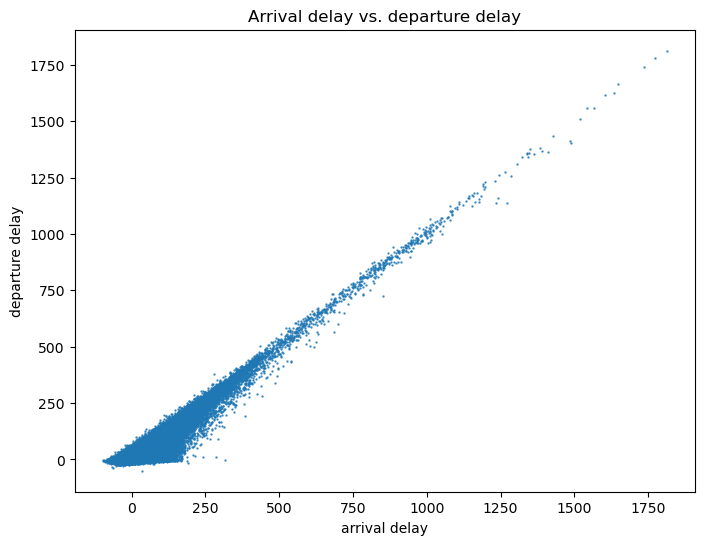

In [29]:
#using the flights dataset to visualize the individual flights 
#with respect to their arrival and departure delay.

plt.figure()

plt.scatter(flights['arr_delay'], flights['dep_delay'],
            s=0.5, alpha=0.8)
plt.xlabel('arrival delay')
plt.ylabel('departure delay')
plt.title('Arrival delay vs. departure delay')

plt.show()

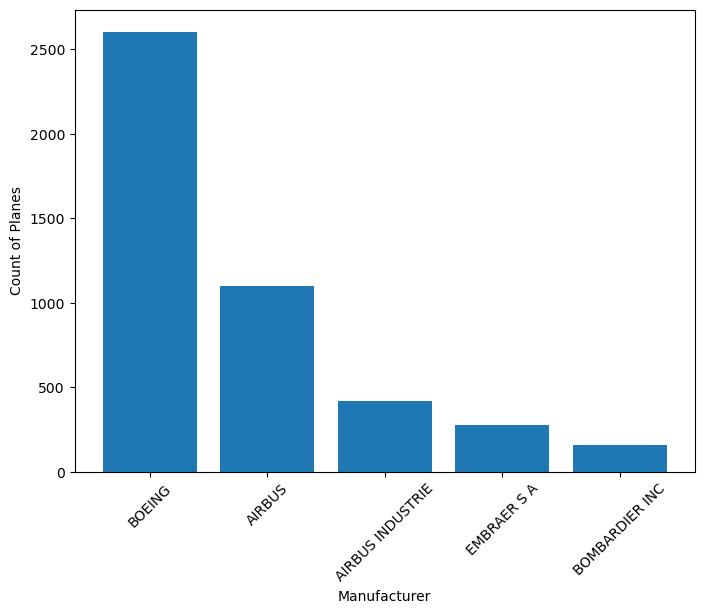

In [31]:
# Get the total number of planes from top 5 manufacturers with highest number of planes

counts = planes.groupby('manufacturer').size().sort_values(ascending=False).head(5)

plt.figure()

plt.bar(counts.index, counts)

plt.xlabel('Manufacturer')
plt.ylabel('Count of Planes')

plt.xticks(rotation = 45) # This will rotate the labels by 45 degrees.
plt.show()

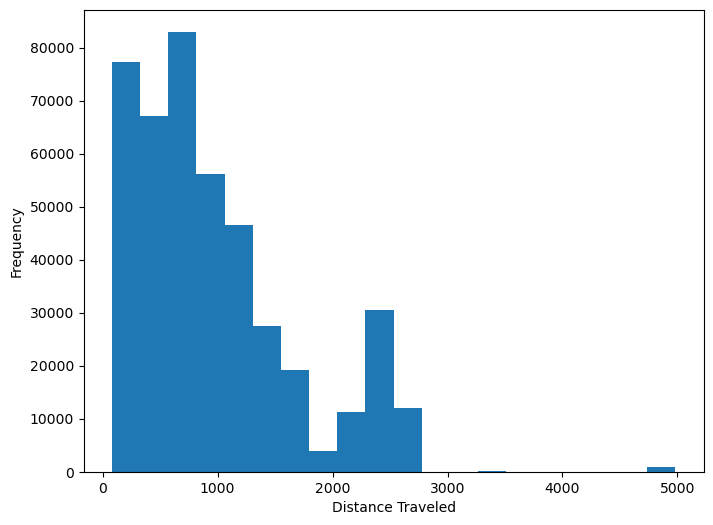

In [32]:
# This code creates a histogram to visualize the distribution of flight distances,
# showing how frequently different distance ranges occur in the dataset.
plt.figure()

plt.hist(flights['distance'], bins=20)
plt.xlabel('Distance Traveled')
plt.ylabel('Frequency')

plt.show()

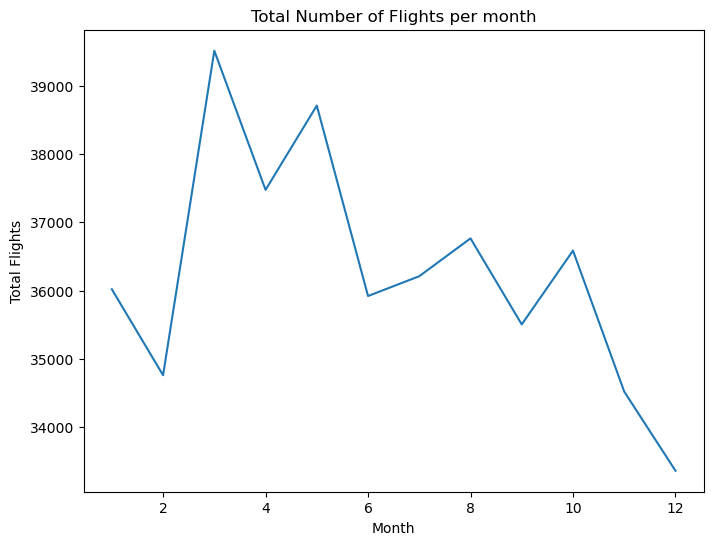

In [33]:
#total monthly number of flights over a year

monthly_counts = flights.groupby('month').size()
plt.figure()

plt.plot(monthly_counts.index, monthly_counts.values)

plt.xlabel('Month')
plt.ylabel('Total Flights')

plt.title('Total Number of Flights per month')
plt.show()

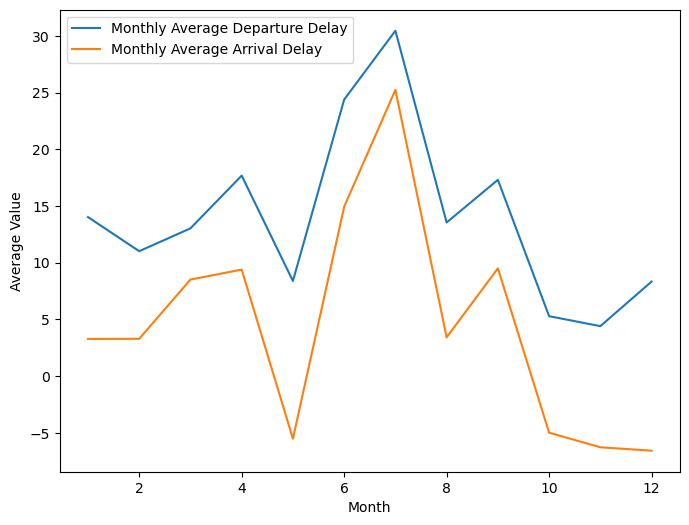

In [34]:
#analysing monthly average departure and arrival delays across a year

monthly_delay = flights.groupby('month')[['dep_delay', 'arr_delay']].agg(np.mean)

plt.figure()

plt.plot(monthly_delay.index, monthly_delay['dep_delay'].values, label='Monthly Average Departure Delay')
plt.plot(monthly_delay.index, monthly_delay['arr_delay'].values, label='Monthly Average Arrival Delay')


plt.xlabel('Month')
plt.ylabel('Average Value')

plt.legend()
plt.show()

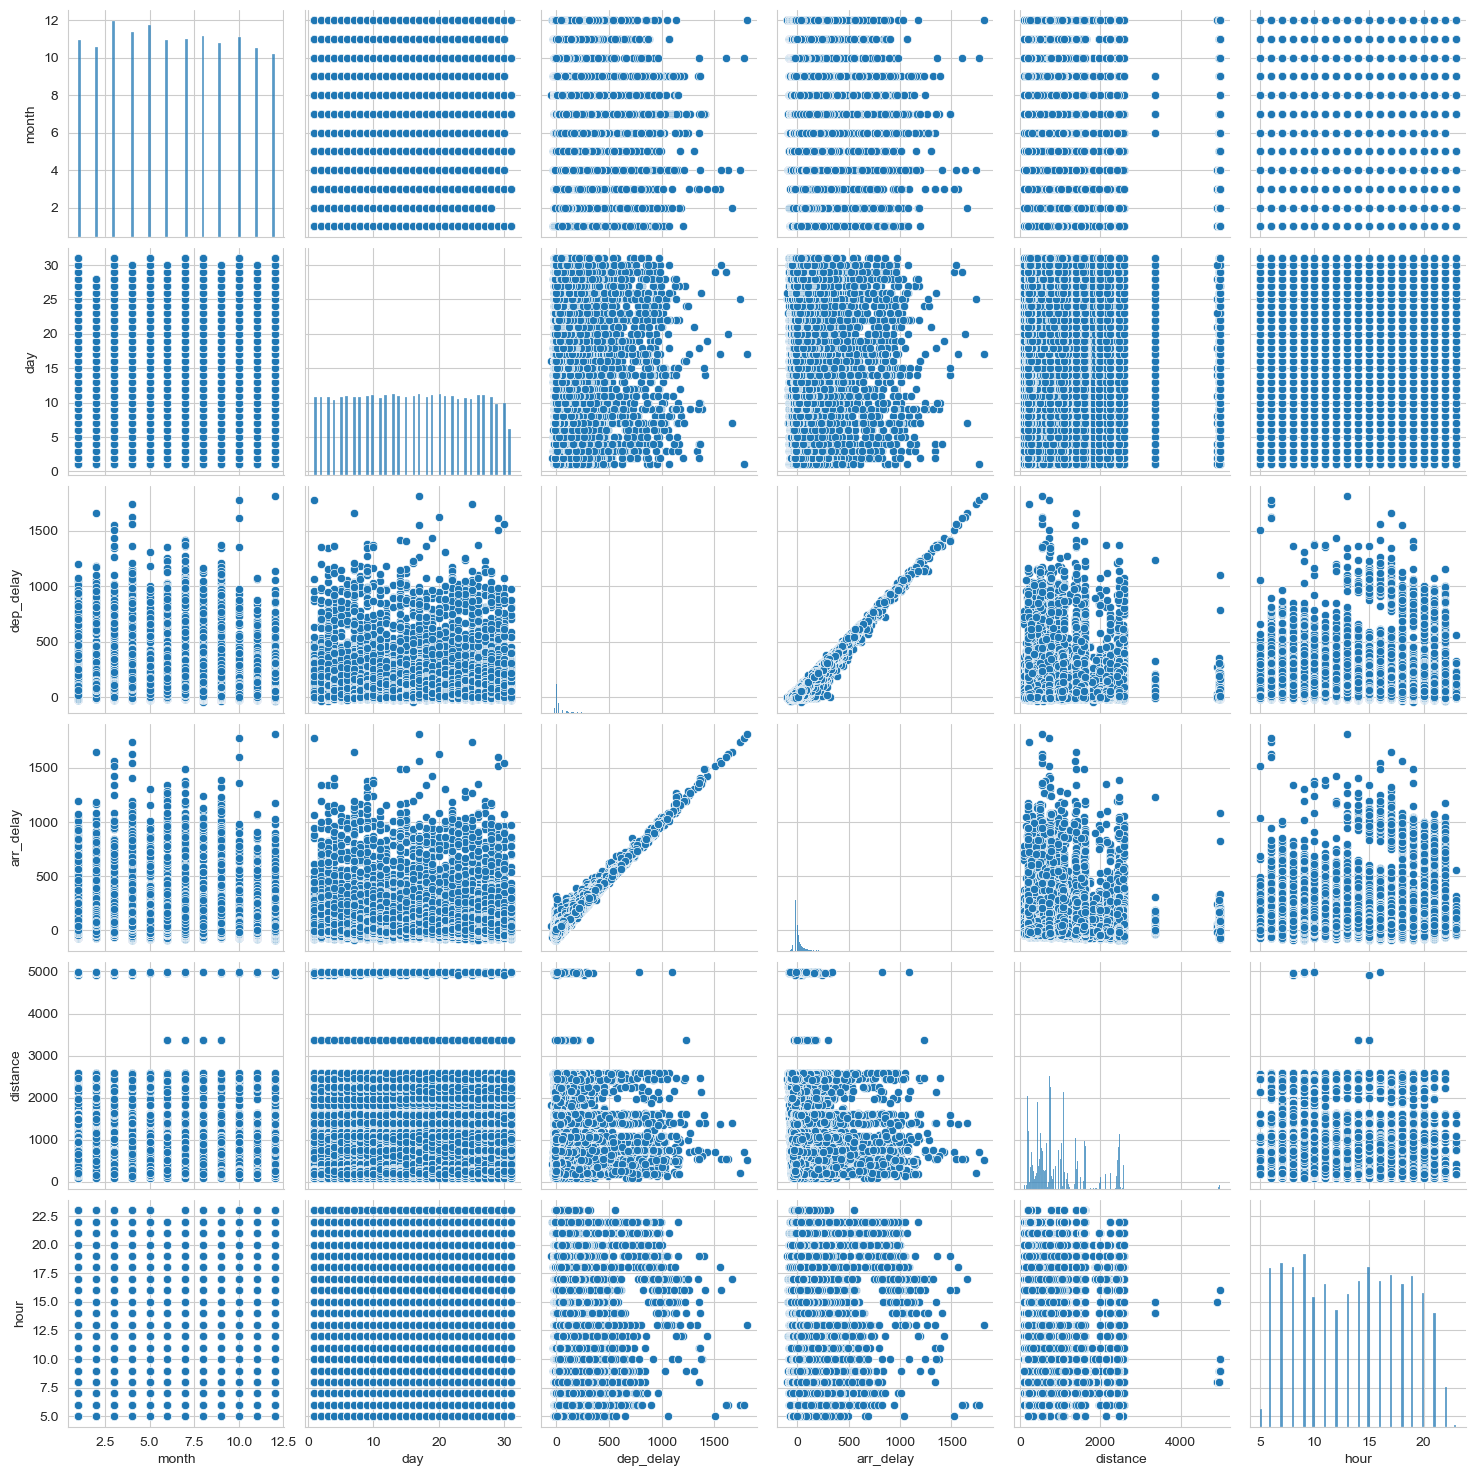

In [36]:
import seaborn as sns

sns.set_style('whitegrid') # setting the default style of plots for the notebook

#A scatter matrix is a matrix of scatterplots, visualizing up to every pair of columns from your data as a scatterplot.
sns.pairplot(flights[['month', 'day',  'dep_delay', 'arr_delay','distance', 'hour']])

plt.show()